In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#instalar scikit-learn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector

### Pré processamento

In [33]:
# Lendo a base de dados; ler xlsx
dados = pd.read_excel('./filmes.xlsx')

# Visualizando a base de dados
dados.head()

,Cenas de Luta,Nível de Humor,Passa no Futuro,Orçamento,Público Alvo,Baseado em Fatos Reais,Tem Música Marcante,Gênero
0,Sim,Baixo,Não,Alto,Adulto,Não,Sim,Ação
1,Não,Alto,Não,Médio,Jovem,Não,Sim,Comédia
2,Sim,Baixo,Sim,Alto,Jovem,Não,Sim,Ficção Científica
3,Sim,Médio,Não,Médio,Jovem,Sim,Não,Ação
4,Não,Alto,Não,Baixo,Infantil,Não,Sim,Comédia


### Normalizando/Separando os dados

In [34]:
# Separar atributos e respostas
atributos = dados.drop('Gênero', axis=1)
resposta = dados['Gênero']
# display(atributos)
# display(resposta)

# Separar colunas categóricas e numéricas, facilitando identificação
col_cat = atributos.select_dtypes(include=object).columns
col_num = atributos.select_dtypes(exclude=object).columns

# Transformando atributos
transformar = ColumnTransformer(transformers=[
    ('categoricas', OrdinalEncoder(), col_cat)
], remainder='passthrough')  # mantém as numéricas

atributos = transformar.fit_transform(atributos)

# Ajustar ordem das colunas: primeiro as categóricas transformadas, depois as numéricas
nova_ordem_colunas = list(col_cat) + list(col_num)

df_atributos = pd.DataFrame(atributos, columns=nova_ordem_colunas)
# display(df_atributos)



### Separando treino em 75% e teste em 30%

In [35]:
# separar em treino 70% e 30% teste 
x_treino, x_teste, y_treino, y_teste = train_test_split(atributos, resposta, test_size=0.25, random_state=0)

# Atributos
# display(pd.DataFrame(x_treino))
# display(pd.DataFrame(x_teste))

# Respostas
# display(pd.DataFrame(y_treino))
# display(pd.DataFrame(y_teste))

### KNN

Acuracia 60.0


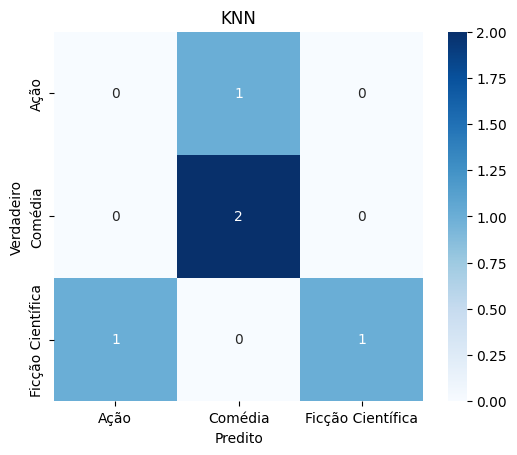

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Definindo os k vizinhos
k = 7

# Criando o classificador
classificador_knn = KNeighborsClassifier(n_neighbors=k)

# Treinando o algoritmo
classificador_knn.fit(x_treino, y_treino)

# Predição
resp_knn = classificador_knn.predict(x_teste)

# Validar a performance
accuracia_knn = accuracy_score(y_teste, resp_knn)

print("Acuracia",accuracia_knn*100)

#matriz de confusão
matriz_confusao_knn = confusion_matrix(y_teste, resp_knn)

# print(matriz_confusao_knn)

# Matriz de confusão gráfica
sns.heatmap(matriz_confusao_knn, fmt='d', square=True, annot=True, 
            cmap='Blues',
            cbar=True,
            yticklabels=classificador_knn.classes_, xticklabels=classificador_knn.classes_)
plt.title('KNN')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()